# 위경도 데이터 scatterplot 으로 표현하기

## 학습목표
- 원하는 데이터를 그래프로 시각화하는 방법을 알아봅니다.

## 핵심키워드
- scatter plot

## 학습하기

In [54]:
# 기본셋팅
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
# window 의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

# 폰트가 선명하게 보이기 위해
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 데이터 불러오기
df = pd.read_csv('source/dataset.csv', low_memory=False)

# 데이터 확인하기
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


### 특정 지역만 보기

In [8]:
# 서울에 있는 데이터의 위도와 경도를 봅니다.
# 결과를 df_seoul 이라는 df에 저장합니다.
# 새로운 변수에 데이터프레임을 저장시 copy() 을 사용합니다.
df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.shape

(18943, 39)

<AxesSubplot:>

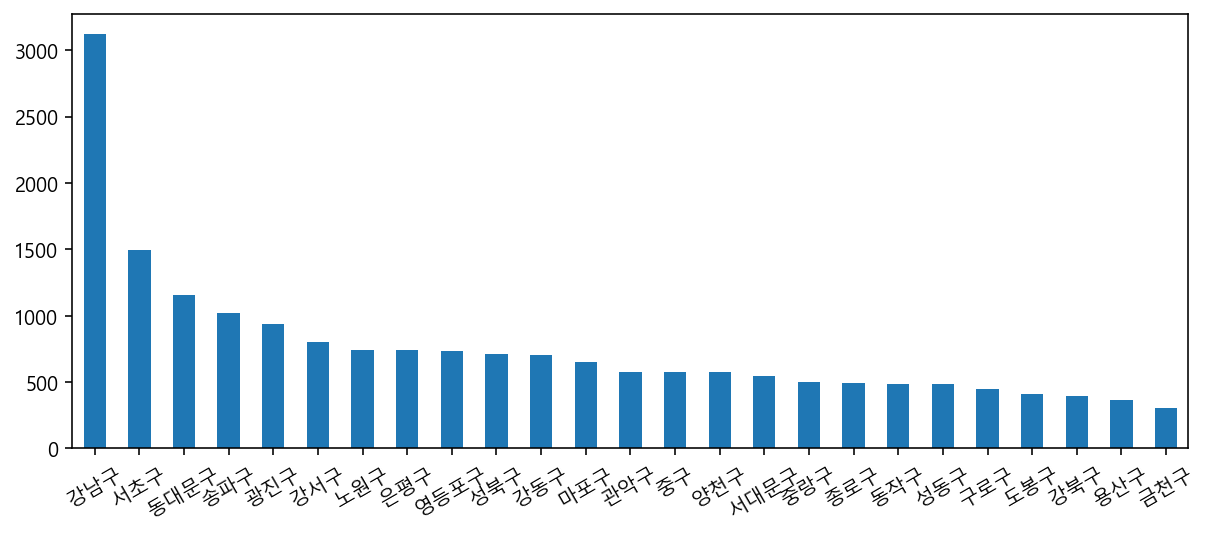

In [14]:
# seaborn 의 countplot 을 사용해서 위에서 만든 df_seoul 데이터프레임의
# 시군구명을 시각화 합니다.
df_seoul['시군구명'].value_counts().plot.bar(figsize=(10, 4), rot=30)

<AxesSubplot:xlabel='시군구명', ylabel='count'>

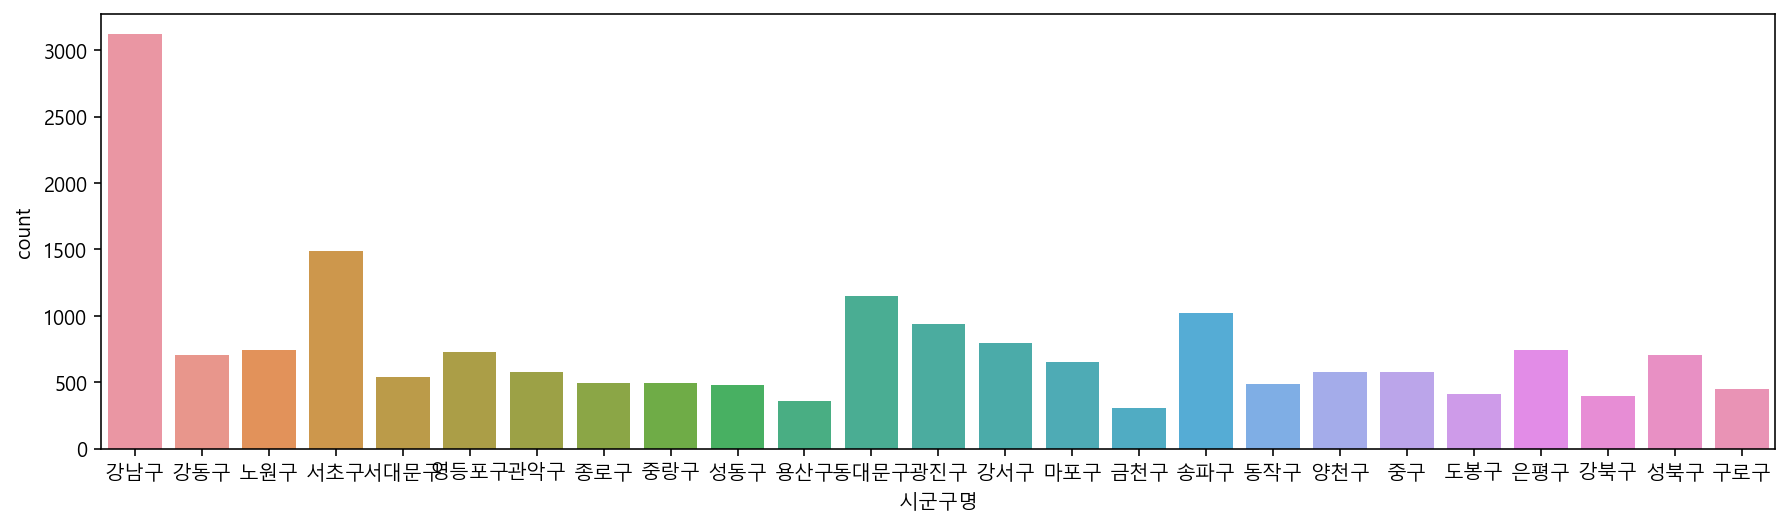

In [18]:
# 시군구명을 seaborn의 countplot으로 그립니다.
plt.figure(figsize = (15, 4))
sns.countplot(
    data = df_seoul,
    x = '시군구명'
)

<AxesSubplot:xlabel='경도', ylabel='위도'>

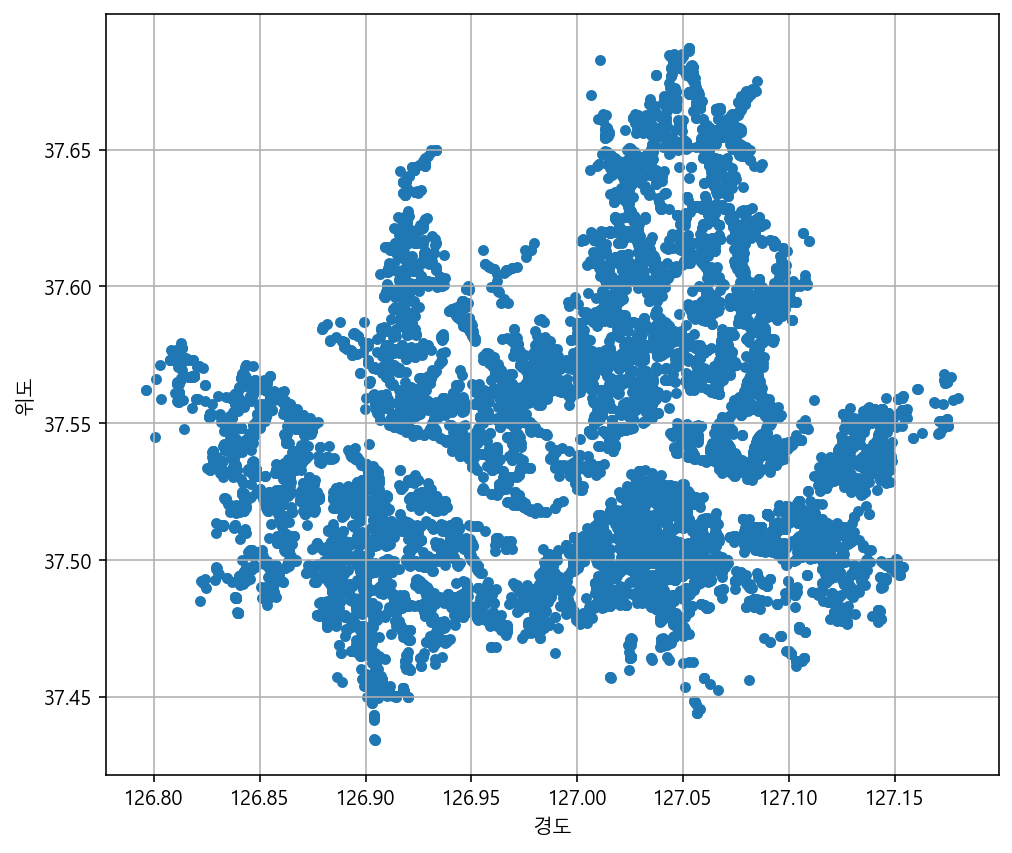

In [23]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.
df_seoul[['경도', '위도', '시군구명']].plot.scatter(x = '경도', y = '위도', figsize = (8, 7), grid = True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

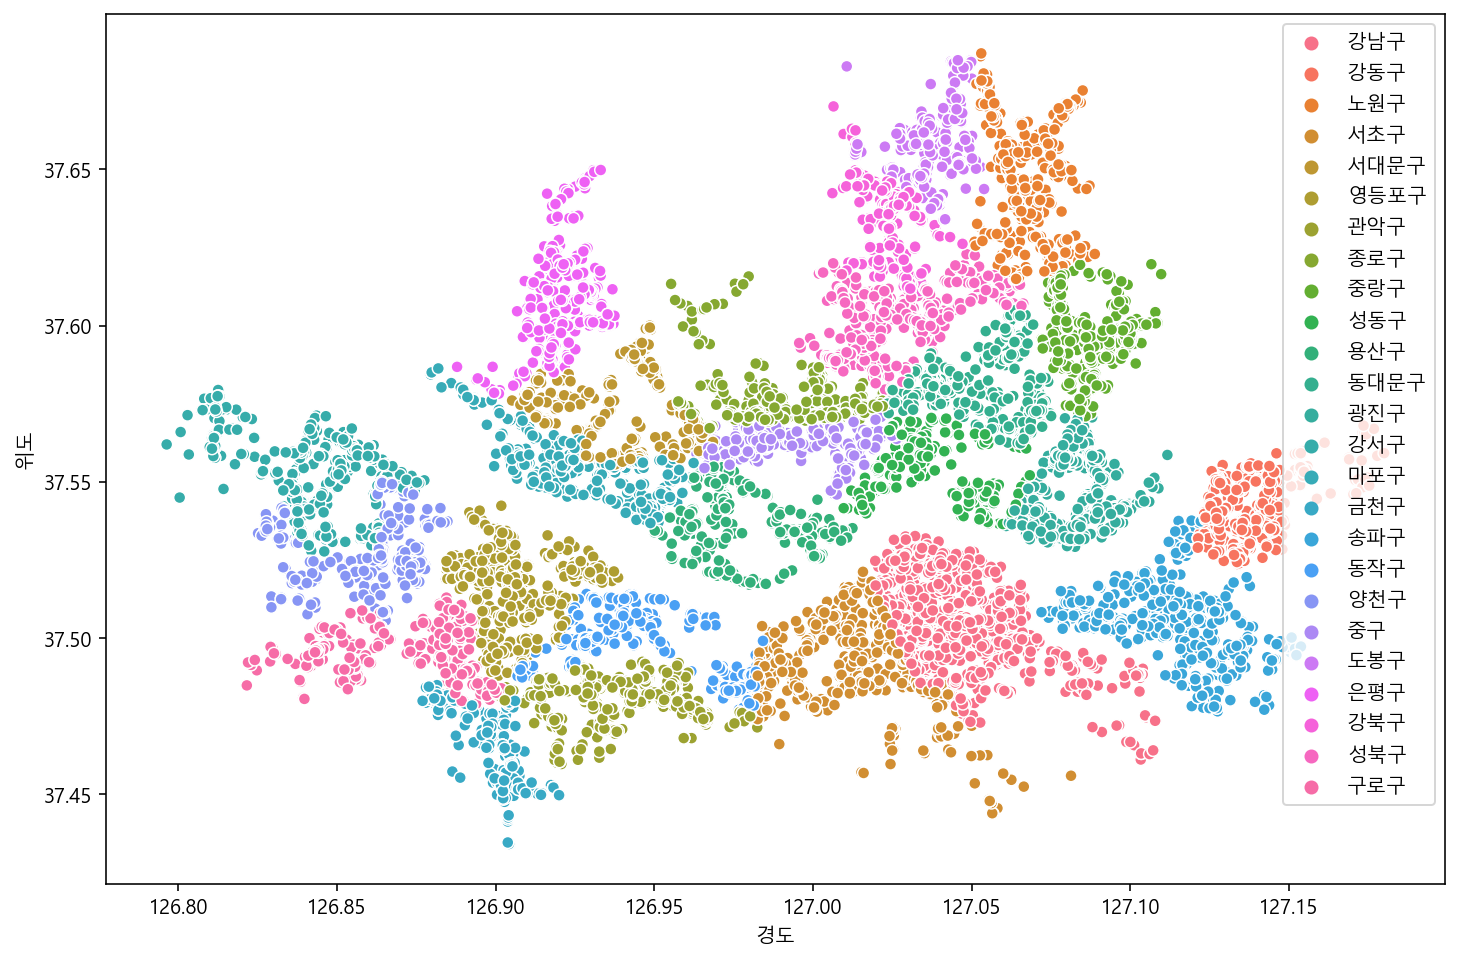

In [62]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
# seaborn 이 업데이트 되면서 hue 파라미터에는 list가 들어가야한다. ( 강의랑 좀 다름 )
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data = df_seoul,
    x = '경도',
    y = '위도',
    hue = df_seoul['시군구명'].tolist(),
)

<AxesSubplot:xlabel='경도', ylabel='위도'>

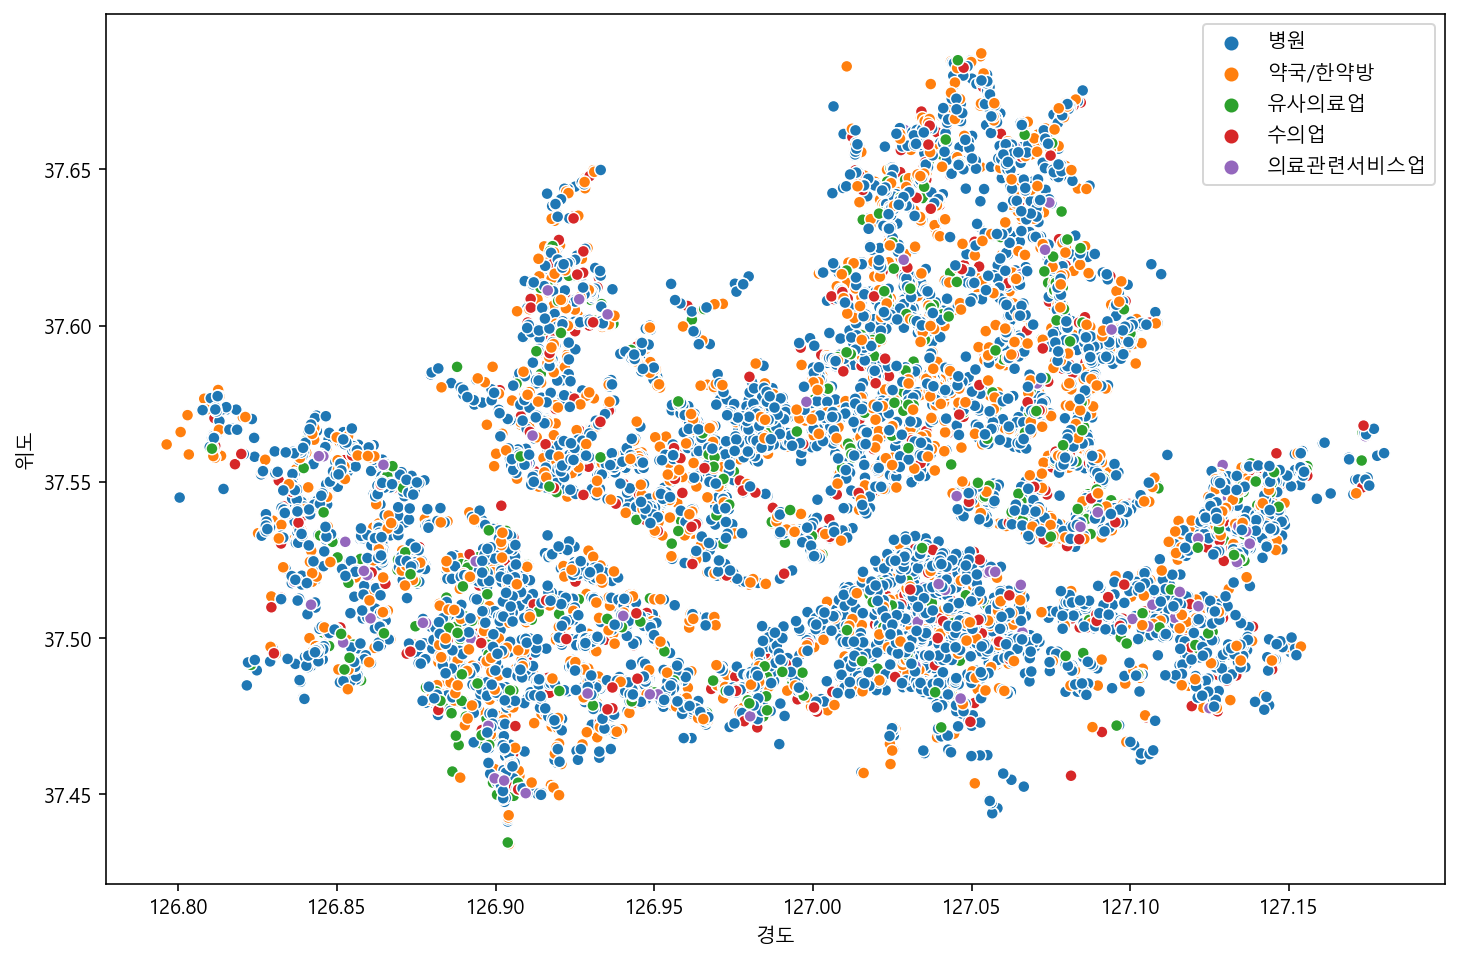

In [42]:
# seaborn의 scatterplot 을 통해 '상권업종중분류명' 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data = df_seoul,
    x = '경도',
    y = '위도',
    hue = df_seoul['상권업종중분류명'].tolist(),
)

<AxesSubplot:xlabel='경도', ylabel='위도'>

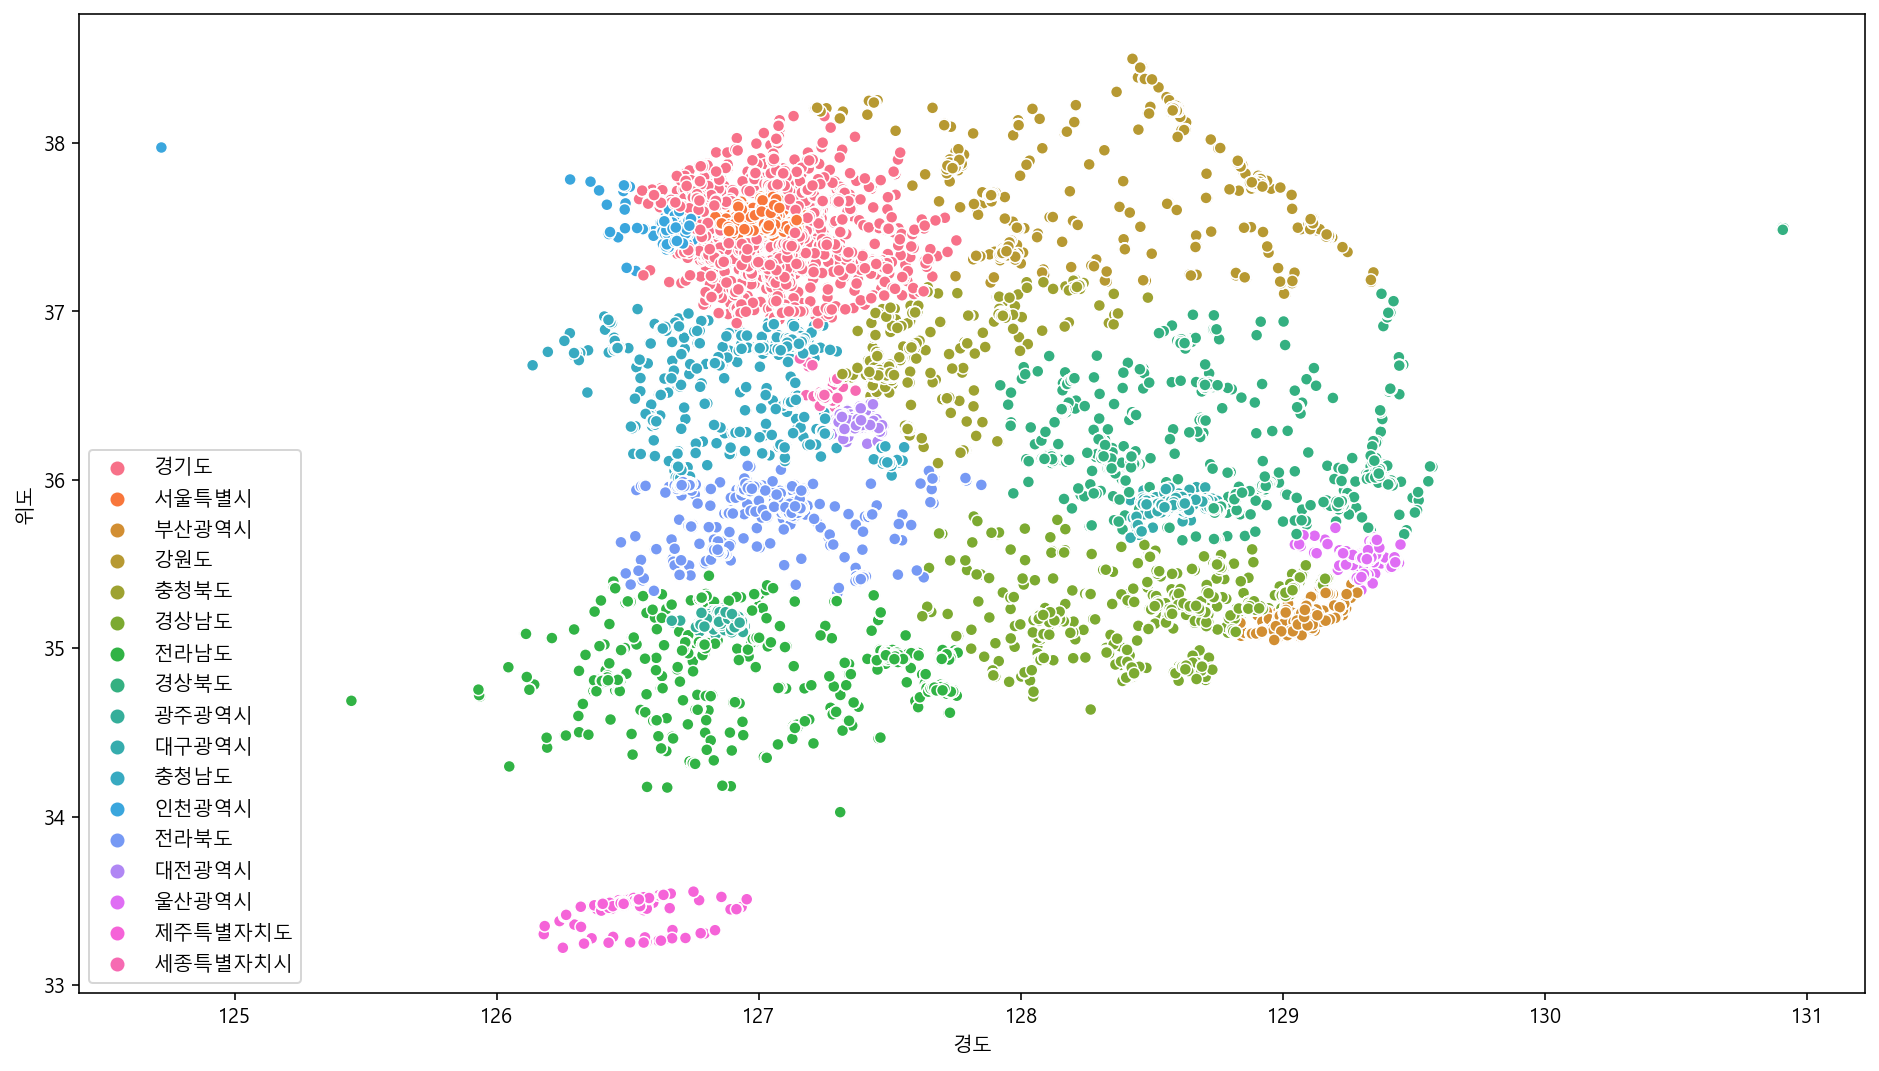

In [60]:
# seaborn의 scatterplot 을 통해 전국 데이터(df)로 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 9))
sns.scatterplot(
    data = df,
    x = '경도',
    y = '위도',
    hue = df['시도명'].tolist() # seaborn 업데이트 이후 '시도명' 으로만 쓰면 출력안됨
)